In [249]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import networkx as nx
np.random.seed(123)

In [250]:
# import networkx as nx

# G=nx.Graph()
# for i in range(10):
#     G.add_node(i, name=i)
#     if i != 0:
#         edge = (i-1, i) 
#     G.add_edge(*edge)
# G.add_edge(0, 9)

# print("Nodes of graph: ")
# print(G.nodes())
# print("Edges of graph: ")
# print(G.edges())

In [251]:
# nx.draw(G)
# plt.show() # display

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'Network')

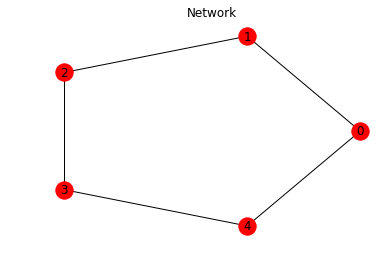

In [319]:
N = 5
t_max = 100
f = np.empty((t_max, N)) # fitness value per species per timestep
f[0,:] = np.random.random(N)
g = nx.erdos_renyi_graph(N, 0.01)

for i in range(N):
    g.add_node(i, name=i)
    if i != 0:
        edge = (i-1, i) 
    g.add_edge(*edge)
g.add_edge(0, 4)

for t in range(t_max-1):
    i = np.argmin(f[t])
    idx = list(g[i])
    f[t+1] = f[t]
    f[t+1, i] = np.random.random()
    f[t+1, idx] = np.random.random(len(idx))
    
fig, ax = plt.subplots()
nx.draw_circular(g, with_labels=True)
ax.set_title("Network")

# fig, ax = plt.subplots(figsize=(5,9))
# ax.imshow(f[:,:], cmap="plasma", aspect="auto")
# ax.set_xlabel("Species")
# ax.set_ylabel("Time")

In [320]:
list(g.nodes)

[0, 1, 2, 3, 4]

In [342]:
class Site:
    def __init__(self, i, j):
        self.i = i
        self.j = j
        self.species = {}
    
    def add_specie(self, specie):
        self.species[specie] = 1
        
    def empty_specie(self, specie):
        self.species[specie] = 0
        
class Lattice:
    def __init__(self, dimension):
        self.dimension = dimension
        self.sites = np.empty([dimension, dimension], dtype=object)
        
    def create_sites(self, g):
        for i in range(self.dimension):
            for j in range(self.dimension):
                self.sites[i][j] = Site(i, j)
                for specie in list(g.nodes):
                    self.sites[i][j].empty_specie(specie)
                    
    def migration(self, migrate_candidates):
        for c in migrate_candidates:
            for i in range(self.dimension):
                for j in range(self.dimension):
                    if self.sites[i][j].species[c] == 1:
                        if np.random.random_sample() > 0.75:
                            nesw = np.random.random_integers(0, 3)
                            if nesw == 0 and i < self.dimension and j < (self.dimension-1) and i > 0 and j > 0:
                                self.sites[i][j+1].species[c] = 1
                            if nesw == 1 and i < (self.dimension-1) and j < self.dimension and i > 0 and j > 0:
                                self.sites[i+1][j].species[c] = 1
                            if nesw == 2 and i < self.dimension and j < self.dimension and i > 0 and (j-1) > 0:
                                self.sites[i][j-1].species[c] = 1
                            if nesw == 3 and i < self.dimension and j < self.dimension and (i-1) > 0 and j > 0: 
                                self.sites[i-1][j].species[c] = 1
                        else:
                            self.sites[i][j].species[c] == 0
                            
            # TODO make function that saves lattice state for each timestep
            
            # TODO death function
                          
    def show_species(self):
        for i in range(self.dimension):
            for j in range(self.dimension):
                print(i,j, self.sites[i][j].species)  
                
    def lattice_for_specie(self, specie):
        specie_lattice = np.zeros([dimension, dimension])
        for i in range(self.dimension):
                for j in range(self.dimension):
                    specie_lattice[i][j] = self.sites[i][j].species[specie]
        return specie_lattice

In [343]:
dimension = 50
l = Lattice(dimension)
l.create_sites(g)
for specie in list(g.nodes):
    l.sites[int(l.dimension/2)][int(l.dimension/2)].add_specie(specie)
    
migrate_candidates = []
for t in range(len(f-1)):
    migrate_candidates.append(np.argmax(f[t]))

l.migration(migrate_candidates)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead


In [344]:
# l.show_species()

In [345]:
specie_lattice = l.lattice_for_specie(0)

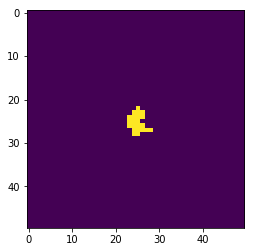

In [346]:
plt.imshow(specie_lattice)